<a href="https://colab.research.google.com/github/JaimeGuandinango/jguandinangoExamen/blob/master/Copia_de_AbejasRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt


In [ ]:
listaPuntos= [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)] #rutas al panal

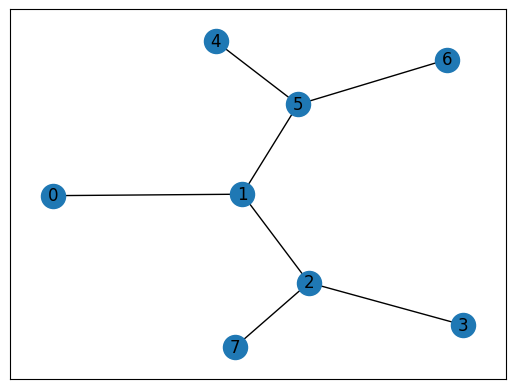

In [ ]:
objetivo =7
import networkx as nx  #libreria de redes graphos
g=nx.Graph()
g.add_edges_from(listaPuntos)
pos=nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos)  #organizar nodos
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos)
plt.show()

In [ ]:
MATRIX_SIZE=8


In [ ]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))

In [ ]:
R *=-1

In [ ]:
for punto in listaPuntos: #Moverse por los puntos
  print(punto)
  if punto[1] == objetivo:
    R[punto] = 100
  else:
    R[punto] = 0
  if punto[0] == objetivo:
    R[punto[::-1]] = 100
  else:
    R[punto[::-1]] = 0
R[objetivo, objetivo] = 100 #Formamos el ambiente


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [ ]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [ ]:
Q= np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gama = 0.8             #correcciones
estadoInicial =1       #punto de partida

In [ ]:
def accionesPosibles(estado):
  estadoActual_fila = R[estado]
  acAvance = np.where(estadoActual_fila >=0)[1]

  return acAvance

In [ ]:
acDisponible = accionesPosibles(estadoInicial)

In [ ]:
def pruebaSiguienteAccion(rangoAccionesPosibles):
  acSiguiente = int(np.random.choice(acDisponible,1))
  return acSiguiente

In [ ]:
accion= pruebaSiguienteAccion(acDisponible)


In [ ]:
def actualizar (estadoActual, accion, gama):
  indiceMayor= np.where(Q [accion,]==np.max(Q[accion,]))[1]
  if indiceMayor.shape[0]>1:
    indiceMayor= int(np.random.choice(indiceMayor, size=1))
  else:
    indiceMayor= int(indiceMayor)

  valorMaximo= Q[accion, indiceMayor]

  Q[estadoActual, accion] = R[estadoActual, accion]+ gama* valorMaximo

  print('valorMaximo', R[estadoActual, accion]+gama*valorMaximo)

  if (np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return 0

In [ ]:
actualizar(estadoInicial, accion, gama)

valorMaximo 0.0


0

In [ ]:
puntajes = []
for i in range(700):
  estadoActual = np.random.randint(0,int(Q.shape[0]))
  acDisponible = accionesPosibles(estadoActual)
  accion = pruebaSiguienteAccion(acDisponible)
  puntaje = actualizar(estadoActual, accion, gama)
  puntajes.append(puntaje)
print("Matriz Q, entrenada")
print(Q/np.max(Q)*100)

valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 100.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 64.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 64.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 64.0
valorMaximo 100.0
valorMaximo 0.0
valorMaximo 180.0
valorMaximo 64.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 64.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 0.0
valorMaximo 80.0
val

El camino mas eficiente: 
[0, 1, 2, 7]


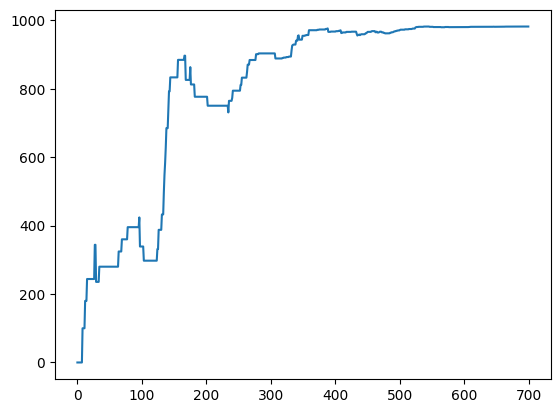

In [ ]:
estadoActual = 0
pasos = [estadoActual]
while estadoActual != 7:
  indiceSiguientePaso = np.where(Q[estadoActual, ] == np.max(Q[estadoActual, ]))[1]
  if indiceSiguientePaso.shape[0] > 1:
    indiceSiguientePaso =  int(mp.random.choice(estadoActual, size = 1))
  else:
    indiceSiguientePaso = int(indiceSiguientePaso)
    pasos.append(indiceSiguientePaso)
    estadoActual = indiceSiguientePaso
print("El camino mas eficiente: ")
print(pasos)
plt.plot(puntajes)
plt.show()